In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
I_size=256
B_size=32
channels=3
Epochs=4
class_names = ['early_blight','late_blight','healthy']

In [3]:
data_set=tf.keras.utils.image_dataset_from_directory(
"plantVillage",
shuffle=True,
image_size=(I_size,I_size),
batch_size=B_size)

Found 2152 files belonging to 3 classes.


early_blight


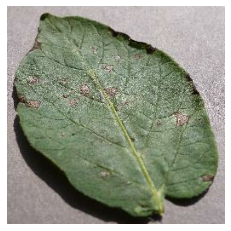

In [21]:
for image_batch,lable_batch in data_set.take(1):
    print(class_names[lable_batch[0].numpy()])
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

In [22]:
train_set=data_set.take(54)
test_set=data_set.skip(54)
val_set=test_set.take(6)
test_set=test_set.skip(6)

late_blight


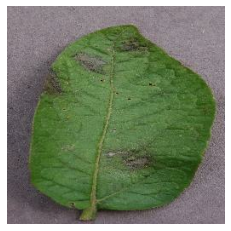

In [28]:
for image_batch,lable_batch in test_set.take(1):
    print(class_names[lable_batch[0].numpy()])
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

In [29]:
len(data_set)

68

In [30]:
len(train_set)

54

In [31]:
len(test_set)

8

In [32]:
len(val_set)

6

In [33]:
# cache() function is used store the image once it is trained in any epoch(iteration) and by applying prefetch both GPU and CPU 
#will work simultaneously.

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_set = test_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_set = val_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [34]:
# specifying that every image must in I_size and scale of 1.0/255

resize_nd_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(I_size,I_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [35]:
# by specifying this our model can work accurately if any image is flipped or rotated 

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [36]:
# Building a Convolution Nueral Network model
In_size = (B_size,I_size,I_size, channels)
n_classes = 3

model = models.Sequential([
    resize_nd_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = In_size),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu', input_shape = In_size),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu', input_shape = In_size),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu', input_shape = In_size),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu', input_shape = In_size),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [37]:
model.build(input_shape=In_size)

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [39]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [40]:
history = model.fit(
    train_set,
    epochs = Epochs,
    batch_size = B_size,
    verbose=1,
    validation_data = val_set
)

Epoch 1/4
54/54 [==============================] - 277s 5s/step - loss: 0.8539 - accuracy: 0.5666 - val_loss: 0.7211 - val_accuracy: 0.6771
Epoch 2/4
54/54 [==============================] - 219s 4s/step - loss: 0.4958 - accuracy: 0.8119 - val_loss: 0.3415 - val_accuracy: 0.8542
Epoch 3/4
54/54 [==============================] - 303s 6s/step - loss: 0.2543 - accuracy: 0.8941 - val_loss: 0.1765 - val_accuracy: 0.9323
Epoch 4/4
54/54 [==============================] - 272s 5s/step - loss: 0.1660 - accuracy: 0.9381 - val_loss: 0.1435 - val_accuracy: 0.9531


In [42]:
scores = model.evaluate(test_set)

8/8 [==============================] - 13s 911ms/step - loss: 0.1793 - accuracy: 0.9397


In [43]:
scores

[0.17933516204357147, 0.9396551847457886]

In [44]:
history.params

{'verbose': 1, 'epochs': 4, 'steps': 54}

In [45]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
history.history['accuracy']

[0.5665509104728699,
 0.8119212985038757,
 0.8940972089767456,
 0.9380787014961243]

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

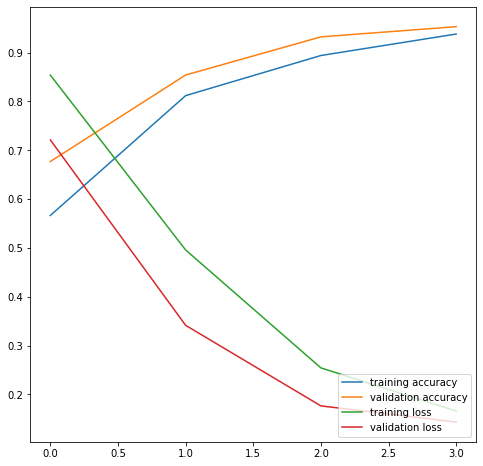

In [49]:
plt.figure(figsize=(8,8))
plt.plot(range(Epochs), acc, label='training accuracy')
plt.plot(range(Epochs), val_acc, label='validation accuracy')
plt.plot(range(Epochs), loss, label='training loss')
plt.plot(range(Epochs), val_loss, label='validation loss')
plt.legend(loc='lower right')

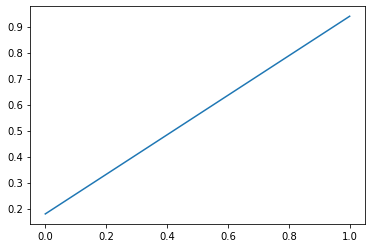

In [50]:
plt.plot(scores)

actual_lable: late_blight
1/1 [==============================] - 1s 1s/step
predicted lable: early_blight


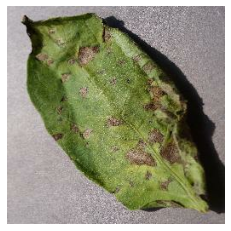

In [54]:
# from test dataset taken first batch data and checking the actual data and the predicted data of the model
import numpy as np
for image_batch, label_batch in test_set.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_lable = lable_batch[0].numpy().astype('uint8')
    
    print("actual_lable:", class_names[first_lable])
    prediction = model.predict(image_batch)
    print("predicted lable:",class_names[np.argmax(prediction[0])])
    plt.imshow(first_image)
    plt.axis('off')

In [52]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    pred = model.predict(img_array)
    
    pred_class = class_names[np.argmax(pred[0])]
    confidence = round(100*(np.argmax(pred[0])),2)
    
    return pred_class,confidence

1/1 [==============================] - 1s 677ms/step


NameError: name 'np' is not defined

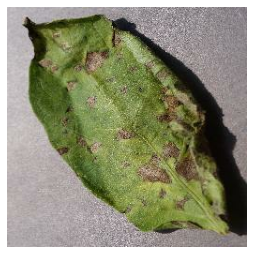

In [53]:
plt.figure(figsize=(15,15))
for images,labels in test_set.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        
        img_class,img_conf = predict(model,images[i].numpy())
        act_class = class_names[labels[0]]
        
        plt.title(f"actual: {act_class}, \n predicted: {img_class}, \n confidence: {img_conf}")

In [127]:
import os
version = max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
